In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors


In [2]:
df = pd.read_csv("spotify.xls",index_col=[0])

In [3]:
df.head()

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7


In [4]:
df.shape

(1000, 5000)

In [5]:
X = df.values #converted data points into a sparse matrix

In [6]:
X 

array([[ 2,  2,  8, ...,  6, 14,  7],
       [13,  5,  5, ...,  8,  3,  0],
       [ 3,  9,  2, ...,  5,  0, 14],
       ...,
       [ 6,  2,  1, ..., 13,  6, 13],
       [ 7,  0,  8, ..., 11,  9, 12],
       [ 6, 15,  0, ..., 15,  4,  5]], dtype=int64)

In [7]:
from sklearn.decomposition import NMF # Non-negative matrix factorisation

In [8]:
nmf = NMF(n_components=100,max_iter=1000,random_state=200)
# Matrix 1 = 1000 x 100
# Matrix 2 = 100 x 5000

In [9]:
nmf.fit(X)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=1000,
    n_components=100, random_state=200, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [10]:
user_matrix = nmf.transform(X)

In [11]:
user_matrix.shape

(1000, 100)

In [12]:
song_matrix = nmf.components_.T

In [13]:
song_matrix.shape

(5000, 100)

In [14]:
user_matrix

array([[0.03041152, 0.        , 6.03735754, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.10450949, 0.        , ..., 0.        , 1.51397869,
        0.        ],
       [0.        , 3.09227919, 0.        , ..., 0.62299824, 0.        ,
        0.        ],
       ...,
       [0.        , 1.26239448, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.11442141, 3.90306648, 0.5963574 , ..., 0.        , 0.51928477,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.32054707, 0.        ,
        0.        ]])

In [15]:
song_matrix

array([[0.29227977, 0.29155378, 0.23095434, ..., 0.02158349, 0.        ,
        0.042259  ],
       [0.2201218 , 0.        , 0.        , ..., 0.        , 0.52120311,
        0.16391248],
       [0.        , 0.16101005, 0.        , ..., 0.22639116, 0.26109955,
        0.14051861],
       ...,
       [0.        , 0.29521502, 0.02888085, ..., 0.31876971, 0.2938576 ,
        0.2803698 ],
       [0.21569302, 0.10762248, 0.04239307, ..., 0.17080385, 0.03336278,
        0.28784931],
       [0.10459146, 0.24942716, 0.12342307, ..., 0.31145263, 0.17757793,
        0.22799469]])

Steps in building a recomendation system:
1. Consider recommending songs to user 1. (row loaction:0)
2. Find the Euclidean distance/direct distance between the user1 and all the other users(999).
3. Find out the top 10 songs heard by the closest 5 users.
4. Recommend the songs to user 1.





In [16]:
# Calculating direct distance or Euclidean distance

def caldist(u1,u2):
    return pow(sum([pow(u1[x]-u2[x],2)for x in range(len(u1))]),0.5)


In [17]:
caldist(user_matrix[0],user_matrix[1])

16.40023520154437

In [18]:
# Calculating distance between base user and all other users

def distfromuser(wuser,user_matrix):
    import sys
    distance = []
    for i in range(len(user_matrix)):
        if wuser != i:
            distance.append(caldist(user_matrix[wuser],user_matrix[i]))
        else:
            pass
    return distance

In [19]:
distuser1 = distfromuser(0,user_matrix)

In [20]:
distuser1

[16.40023520154437,
 15.537635020707953,
 14.639473650985135,
 14.00754490297462,
 13.971320822462829,
 14.458815384101626,
 15.439919100936859,
 15.365881759409879,
 14.750585290427352,
 13.757119242948248,
 13.436281556851842,
 14.23404596385921,
 14.673781427380185,
 15.645889218172604,
 15.713779804329265,
 14.174156011044325,
 14.151881525402818,
 14.12718345338467,
 14.872031632771213,
 14.423506734473825,
 15.565049450248116,
 14.66272806887372,
 13.844900902500564,
 15.712321900981568,
 15.466713621430403,
 15.824884352775166,
 15.20834665562211,
 15.042134139740515,
 14.897609731638656,
 14.087798476522005,
 14.53888022441716,
 14.770670734041644,
 14.94943188443891,
 13.641154834888052,
 14.249887985867643,
 14.697785817468077,
 16.9711595008353,
 14.722157373603697,
 14.574156283069469,
 12.134159028971172,
 15.540593520830456,
 15.927465373346466,
 13.992981665679855,
 13.674354874305843,
 15.547516232073834,
 14.240597472079068,
 14.120008692543076,
 15.419734523017002,
 1

In [21]:
user_index = np.argsort(distuser1)[0:5] #sorts into ascending order and converts into an array

In [22]:
user_index

array([312, 378, 173, 881, 686], dtype=int64)

In [23]:
# finding songs heard by closest users

for i in user_index:
    print("Songs Heard by the user in index ",i," are:")
    temp = pd.DataFrame(df.iloc[i])
    print(temp[temp.values != 0].index)

Songs Heard by the user in index  312  are:
Index(['song_1', 'song_2', 'song_4', 'song_5', 'song_6', 'song_7', 'song_8',
       'song_9', 'song_11', 'song_12',
       ...
       'song_4990', 'song_4991', 'song_4992', 'song_4993', 'song_4994',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4699)
Songs Heard by the user in index  378  are:
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_10', 'song_12',
       ...
       'song_4989', 'song_4990', 'song_4992', 'song_4993', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4676)
Songs Heard by the user in index  173  are:
Index(['song_1', 'song_2', 'song_3', 'song_5', 'song_6', 'song_7', 'song_8',
       'song_9', 'song_10', 'song_12',
       ...
       'song_4987', 'song_4988', 'song_4989', 'song_4992', 'song_4994',
       'song_4995', 'song_4996', 'song_4997', 'song_499

In [24]:
# Recommending Top 5 songs

def Top5songs(user_index,df):
    temp_df = df.iloc[user_index] # contains all the values coming from user_index
    dict1 = temp_df.max().to_dict() # it gives the songs which are heard the maximum times
    sorted_dictionary = sorted(dict1.items(),key=lambda keyvalue :(keyvalue[1],keyvalue[0]),reverse=True)[0:5]
    return [x[0] for x in sorted_dictionary]

In [25]:
Top5songs(user_index,df)

['song_998', 'song_995', 'song_99', 'song_984', 'song_979']

In [26]:
# Using K-Means for clustering

In [27]:
from sklearn.cluster import KMeans

In [28]:
withincluster_meansquareerror = {}
for k in range(1,50):
    kmeans = KMeans(n_clusters=k,max_iter=1000).fit(song_matrix)
    withincluster_meansquareerror[k] = kmeans.inertia_

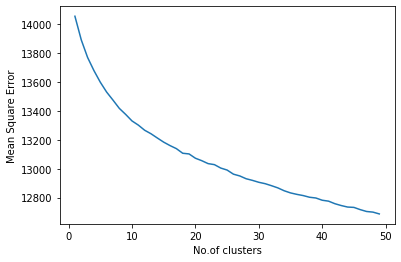

In [29]:
plt.figure()
plt.plot(list(withincluster_meansquareerror.keys()),list(withincluster_meansquareerror.values()))
plt.xlabel("No.of clusters")
plt.ylabel("Mean Square Error")
plt.title("Finding the best value of K")
plt.show()

In [30]:
## DAy 3

In [43]:
def fav_songs(data,no_of_clusters,song_matrix,song_name,n_recommendation):
    kmeans=KMeans(n_clusters=no_of_clusters,max_iter=1000).fit(song_matrix) #makes cluster of the songs
    index_in_songs=data.columns.to_list().index(song_name) #gets the index of the base song from the main database
    song_vector=song_matrix[index_in_songs] #it takes the values of the base song from the decompose song matrix
    allsongs_in_cluster=list(kmeans.predict(song_matrix)) # Prepares clusters for all the song in the song matrix
    songs_in_cluster_of_basesong=[x for x in range(len(allsongs_in_cluster)) if allsongs_in_cluster[x]==kmeans.predict([song_vector])]##checking the song which are alike a base song
    song_cluster=song_matrix[songs_in_cluster_of_basesong]
    KNN=NearestNeighbors(n_neighbors=n_recommendation)
    KNN.fit(song_cluster)
    recommended_songs=KNN.kneighbors([song_matrix[index_in_songs]])
    col_list=list(df.columns)
    return [col_list[x] for x in recommended_songs[1][0]]
    

In [44]:
fav_songs(df,12,song_matrix,"song_2",5)

['song_1', 'song_193', 'song_114', 'song_147', 'song_173']